In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns
import modelo_ini_corona as cu

In [473]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

# Datos

In [8]:
path_curvas='/Users/mrcristian5/Documents/vscode/dtwcoronahornosacmi/datapac/'
ls_archivos=["H4_Julio2024_106Carros.csv","H4_Nov2024_110Carros.csv","H4_Oct2023_110Carros.csv","H4_Oct2024_110Carros.csv","H4_Sept2024_110Carros.csv","H4_Sept282023_110Carros.csv"]

In [383]:
df_curvaoct=pd.read_csv(path_curvas+ls_archivos[2], delimiter=';',encoding="cp1250", decimal=',')
df_curvaoct=df_curvaoct.dropna()

In [ ]:
df_curva1=pd.read_csv(path_curvas+ls_archivos[-2], delimiter=';',encoding="cp1250", decimal=',', usecols=[0,1,2,3,4,5,6,9])

In [10]:
df_curvajul=pd.read_csv(path_curvas+ls_archivos[0], delimiter=';',encoding="cp1250", decimal=',')

In [11]:
df_curvajul=df_curvajul.dropna()

In [12]:
df_curva1=df_curva1.dropna()

<Axes: >

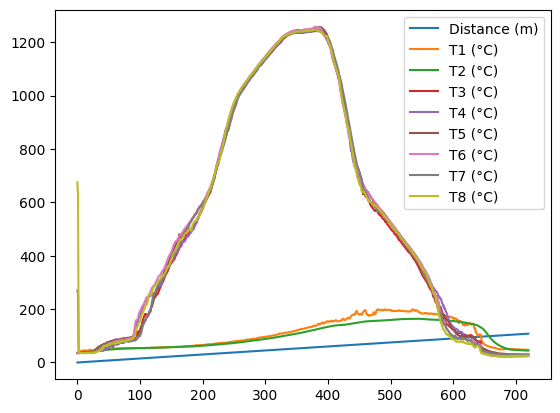

In [13]:
df_curvajul.plot()

<Axes: >

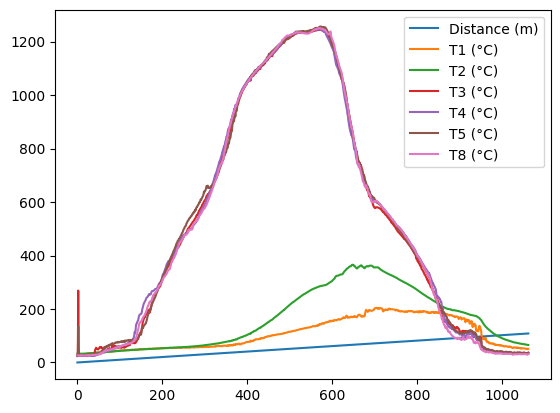

In [14]:
df_curva1.plot()

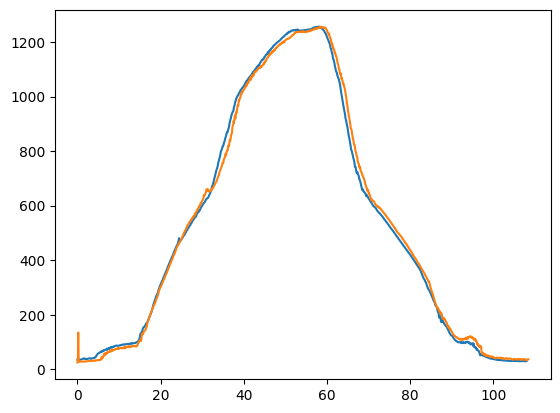

In [54]:
plt.plot(df_curvajul['Distance (m)'], df_curvajul['T5 (°C)'])
plt.plot(df_curva1['Distance (m)'], df_curva1['T5 (°C)'])

## Dos curvas cualquiera

In [76]:
distancias=np.array([16.11, 20.22, 25.34, 34.54 , 39.46, 44.583 , 50.8815,55.0805,58.00, 61.27, 63.4785, 68.777 , 70.8765, 76.39 , 80.374 ,85.573 ])
#distancias=np.array([16.11, 20.22, 25.34, 34.54 , 39.46, 44.583 , 50.8815,55.0805, 61.27, 63.4785, 68.777 , 70.8765, 76.39 , 80.374 ,85.573 ])
#distancias=np.array([16.11, 20.22, 25.34, 34.54 , 39.46, 44.583 , 50.8815,55.0805, 61.27, 63.4785, 69.777 , 71.8765, 76.39 , 80.374 ,85.573 ])

In [20]:
int_curv_ju=cu.interpolador_fun_1d(df_curva1['Distance (m)'].values, df_curva1['T5 (°C)'].values, 'linear')

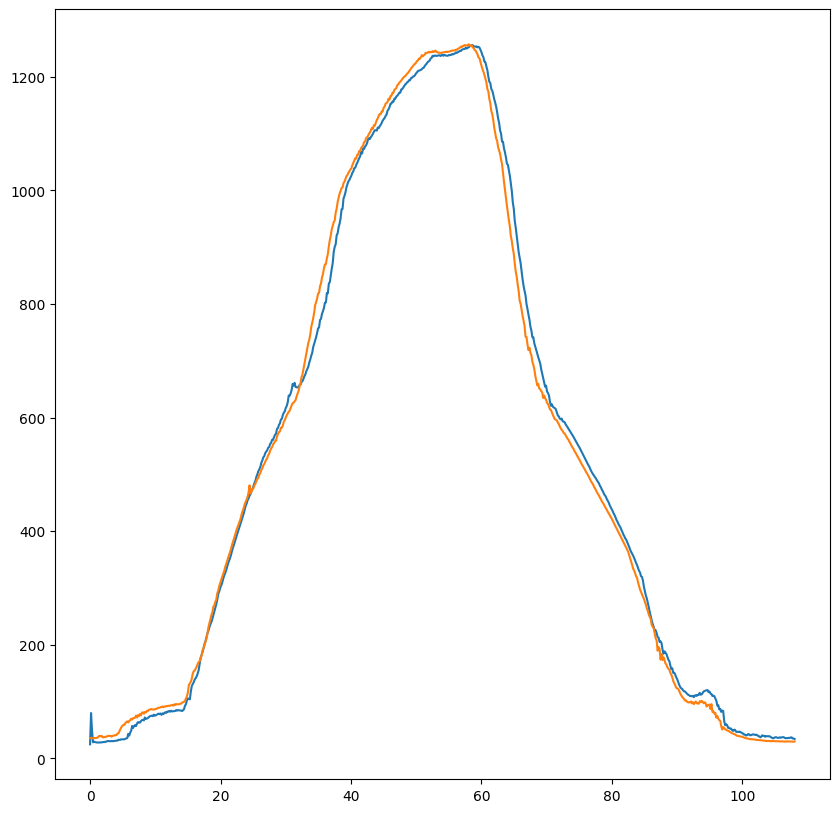

In [35]:
plt.figure(figsize=(10,10))
plt.plot(df_curvajul['Distance (m)'],int_curv_ju(df_curvajul['Distance (m)']))
plt.plot(df_curvajul['Distance (m)'],df_curvajul['T5 (°C)'])

In [71]:
df_curva1['T5 (°C)'].max()

np.float64(1256.6)

In [25]:
from scipy.integrate import trapezoid

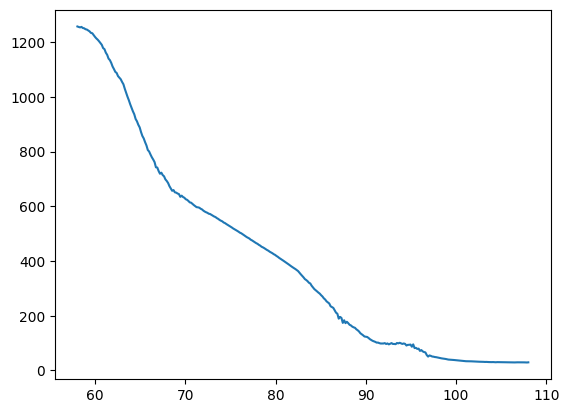

In [75]:
plt.plot(df_curvajul[df_curvajul['Distance (m)']>58]['Distance (m)'], df_curvajul[df_curvajul['Distance (m)']>58]['T5 (°C)'])

In [27]:
trapezoid(y=int_curv_ju(df_curvajul['Distance (m)'].values),x=df_curvajul['Distance (m)'].values)

np.float64(57158.3925)

In [63]:
trapezoid(df_curvajul[df_curvajul['Distance (m)']<58]['T5 (°C)'],df_curvajul[df_curvajul['Distance (m)']<58]['Distance (m)'])

np.float64(36183.9)

In [62]:
trapezoid(df_curvajul[(df_curvajul['Distance (m)']>58)]['T5 (°C)'],df_curvajul[df_curvajul['Distance (m)']>58]['Distance (m)'])

np.float64(20423.6775)

In [50]:
trapezoid(df_curva1[(df_curva1['Distance (m)']>58)]['T5 (°C)'],df_curva1[df_curva1['Distance (m)']>58]['Distance (m)'])

np.float64(21472.790500000003)

In [51]:
(1/0.5644410221120443)*21472.79

38042.57514744835

In [53]:
21472.79/35439.373

0.605902085231587

In [52]:
trapezoid(df_curva1[(df_curva1['Distance (m)']<58)]['T5 (°C)'],df_curva1[df_curva1['Distance (m)']<58]['Distance (m)'])

np.float64(35439.373)

In [49]:
20423.6775/36183.9

0.5644410221120443

In [28]:
57158.3925/2

28579.19625

# Pre horno

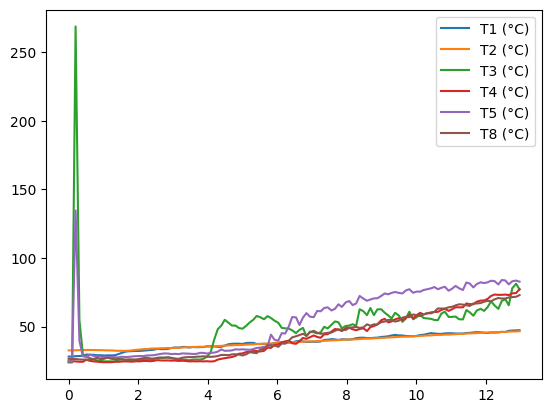

In [186]:
for i in ['T1 (°C)','T2 (°C)','T3 (°C)','T4 (°C)', 'T5 (°C)', 'T8 (°C)']:
    plt.plot(df_curva1[df_curva1['Distance (m)']<13.02]['Distance (m)'],df_curva1[df_curva1['Distance (m)']<13.02][i],label=i)
plt.legend()

In [187]:
cond_pre_horno=(df_curva1['Distance (m)']<13.02)
col_temp=['Distance (m)','T1 (°C)','T2 (°C)','T3 (°C)','T4 (°C)', 'T5 (°C)', 'T8 (°C)']

In [188]:
df_prehcurva1=df_curva1.loc[cond_pre_horno,col_temp]

In [189]:
df_prehcurva1.shape

(128, 7)

In [190]:
data=df_prehcurva1.sample(frac=0.07,replace=False).sort_index()

In [191]:
data.corr()

,Distance (m),T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T8 (°C)
Distance (m),1.000000,0.992525,0.992189,0.898885,0.958093,0.970850,0.963200
T1 (°C),0.992525,1.000000,0.974439,0.907203,0.923056,0.945577,0.932501
T2 (°C),0.992189,0.974439,1.000000,0.887002,0.974794,0.976972,0.979390
T3 (°C),0.898885,0.907203,0.887002,1.000000,0.778316,0.823868,0.782380
T4 (°C),0.958093,0.923056,0.974794,0.778316,1.000000,0.973090,0.996698
T5 (°C),0.970850,0.945577,0.976972,0.823868,0.973090,1.000000,0.977260
T8 (°C),0.963200,0.932501,0.979390,0.782380,0.996698,0.977260,1.000000


<Axes: >

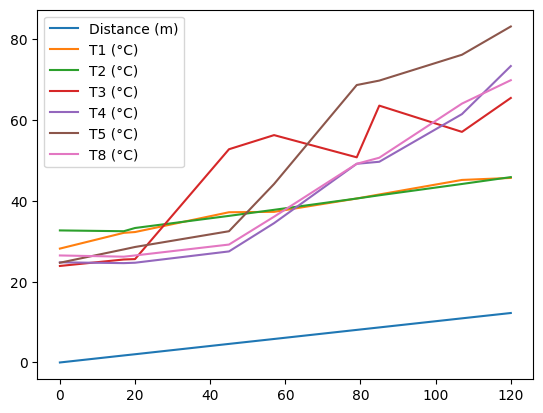

In [192]:
data.plot()

In [193]:
data.shape

(9, 7)

In [104]:
velocidad=cu.velocidad_carro(15.3)

In [195]:
pares_prehorno=data[['Distance (m)','T8 (°C)']].values

In [196]:
df_prehcurva1['T8 (°C)'].values.shape

(128,)

In [197]:
distan,temp=cu.curva_completa(pares_prehorno, puntos=16, metodo='otro')

In [198]:
len(distan)

128

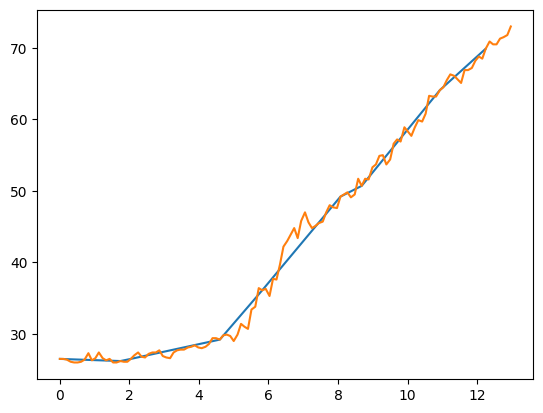

In [199]:
plt.plot(distan,temp)
plt.plot(df_prehcurva1['Distance (m)'].values,df_prehcurva1['T8 (°C)'].values)

## Optimizacion de curva de pre horno y Enfriamiento final

In [77]:
fechas_curvas=['2024-07-25','2024-11-01','2024-10-28','2024-10-11','2024-09-07','2024-09-28']

# Horno

In [126]:
path_temp='/Users/mrcristian5/Documents/vscode/dtwcoronahornosacmi/datos/Horno4.csv'
dia_analisis='2024-09-07'
hora_analisis=' 06:00:00'
dftemp=pd.read_csv(path_temp, low_memory=True, index_col=[0], parse_dates=True)
dftemp.sort_index(inplace=True)
dftemp=dftemp.resample("min").first()
dftemp=dftemp.interpolate(method='time')
#cond_temp=((dftemp.index.to_period('D')==dia_analisis) & (dftemp.index.to_period('H')> dia_analisis+' 05:00:00'))

In [127]:
dftemp.index=dftemp.index.tz_localize(None)

In [128]:
dftemp[['s16','s15']].describe().T

,count,mean,std,min,25%,50%,75%,max
s16,509194.0,1211.571726,11.339026,751.0,1210.0,1212.0,1214.0,1220.0
s15,509194.0,1219.863862,10.500020,0.0,1219.0,1221.0,1222.0,1227.0


In [129]:
col_temp_control=['k2','k4','s6','s8','s10','s12','s14','s16', 's15','s18','s20','k22','k23','k24','k25','k26']
col_temp_nocont=['k1','k3','s5','s7','s9','s11','s13','s15','s17','s19','k21','k23','k24','k25','k26']

In [130]:
cond_temp=((dftemp.index.to_period('d')==dia_analisis) & (dftemp.index.to_period('h')> dia_analisis+' 05:00:00'))
dfcarro=dftemp.iloc[cond_temp].copy()

In [131]:
len(distancias)

16

In [414]:
temp_sp=[i+'sp' for i in col_temp_control]

In [418]:
dftemp[temp_sp].tail(1).values

array([[ 170.,  350.,  490.,  740., 1014., 1134., 1213., 1215., 1222.,
        1183., 1106.,  670.,  620.,  520.,  440.,  290.]])

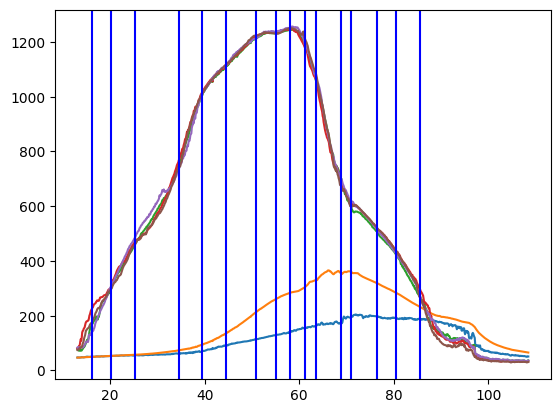

In [132]:
# plt.figure(figsize=(16,16))
for i in ['T1 (°C)','T2 (°C)','T3 (°C)','T4 (°C)', 'T5 (°C)', 'T8 (°C)']:
    plt.plot(df_curva1[df_curva1['Distance (m)']>=13.02]['Distance (m)'],df_curva1[df_curva1['Distance (m)']>=13.02][i])
for j in distancias:
    plt.axvline(x = j, color = 'b')

In [133]:
dfcurvahorno=df_curva1[df_curva1['Distance (m)']>=13.02]

In [134]:
dfcurvahorno[dfcurvahorno['Distance (m)']==15.11]

,Time (hh:mm:ss),Distance (m),T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T8 (°C)
148,2:25:32,15.11,50.4,48.9,111.8,179.9,104.6,150.5


In [135]:
dfcurvahorno[dfcurvahorno['Distance (m)']==17.26]

,Time (hh:mm:ss),Distance (m),T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T8 (°C)
169,2:46:11,17.26,51.3,50.8,189.7,256.1,187.7,223.4


In [136]:
dfcurvahorno[dfcurvahorno['Distance (m)']==21.45]

,Time (hh:mm:ss),Distance (m),T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T8 (°C)
210,3:26:30,21.45,53.8,54.1,347.7,365.3,352.4,330.9


<Axes: xlabel='_time'>

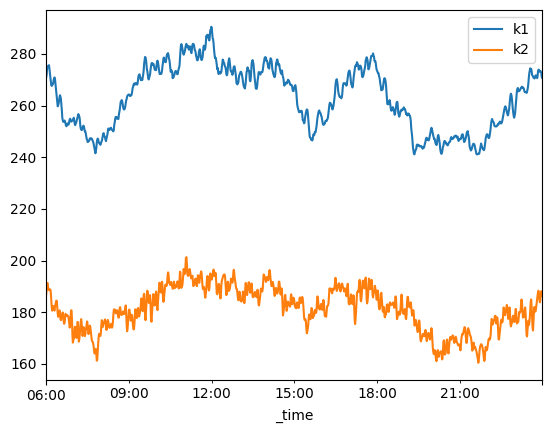

In [137]:
dfcarro[['k1','k2']].plot()

<Axes: xlabel='_time'>

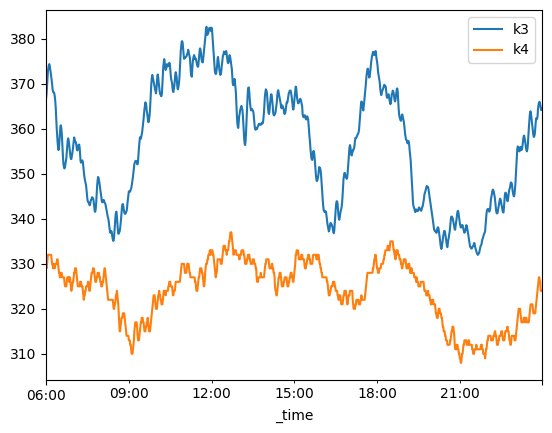

In [138]:
dfcarro[['k3','k4']].plot()

In [139]:
lsclose=[]
for i in distancias:
    lsclose.append(np.isclose(np.round(i,2),dfcurvahorno['Distance (m)'].values, rtol=0.0059,atol=0.01))

In [140]:
distancias[5]

np.float64(44.583)

<Axes: xlabel='_time'>

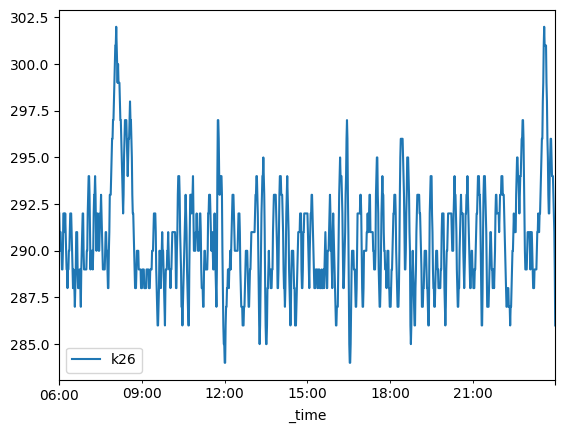

In [141]:
dfcarro[['k26']].plot()

In [142]:
dfcurvahorno[lsclose[14]]

,Time (hh:mm:ss),Distance (m),T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T8 (°C)
783,12:49:57,79.96,192.7,288.7,435.9,449.4,439.0,447.7
784,12:50:56,80.06,191.7,287.8,434.1,446.7,436.6,444.8
785,12:51:55,80.16,192.5,287.0,431.9,444.3,433.7,442.6
786,12:52:54,80.27,191.7,286.0,427.9,442.0,430.9,440.5
787,12:53:53,80.37,192.2,285.2,426.0,440.4,428.8,437.7
788,12:54:52,80.47,192.6,284.3,424.8,438.1,426.9,436.1
789,12:55:51,80.57,191.1,283.3,421.3,435.5,423.6,433.4
790,12:56:50,80.67,190.9,282.4,418.0,432.9,419.6,430.2
791,12:57:49,80.78,189.0,281.4,416.6,433.0,419.3,431.0


## Analisis Voraz

### Aproximacion

In [143]:
dist_c=[15.1195,86.573]

In [384]:
df_curvamarzo=df_curva1=pd.read_csv(path_curvas+'H4_Marzo2024_106Carros.csv', delimiter=';',encoding="cp1250", decimal=',', usecols=[0,1,2,3,4,5,6,9])
df_curvamarzo=df_curvamarzo.dropna()

In [396]:
df_curvamayo=pd.read_csv(path_curvas+'H4_Mayo2024_110Carros.csv', delimiter=';',encoding="cp1250", decimal=',', usecols=[0,1,2,3,4,5,6,9])
df_curvamayo=df_curvamayo.dropna()

In [409]:
df_curvaabril=pd.read_csv(path_curvas+'H4_Enero2024_103Carros.csv', delimiter=';',encoding="cp1250", decimal=',', usecols=[0,1,2,3,4,5,6,9])
df_curvaabril=df_curvaabril.dropna()

In [444]:
tsp=['k2sp','k1sp','k4sp', 'k3sp','s6sp','s8sp','s10sp','s12sp','s14sp','s16sp','s15sp','s18sp','s20sp','k22sp','k23sp','k24sp','k25sp','k26sp']

In [447]:
distancias2=np.array([16.11  ,18.5 ,20.22  ,23,25.34  , 34.54  , 39.46  , 44.583 , 50.8815,55.0805, 58.    , 61.27  , 63.4785, 68.777 , 70.8765, 76.39  ,80.374 , 85.573 ])

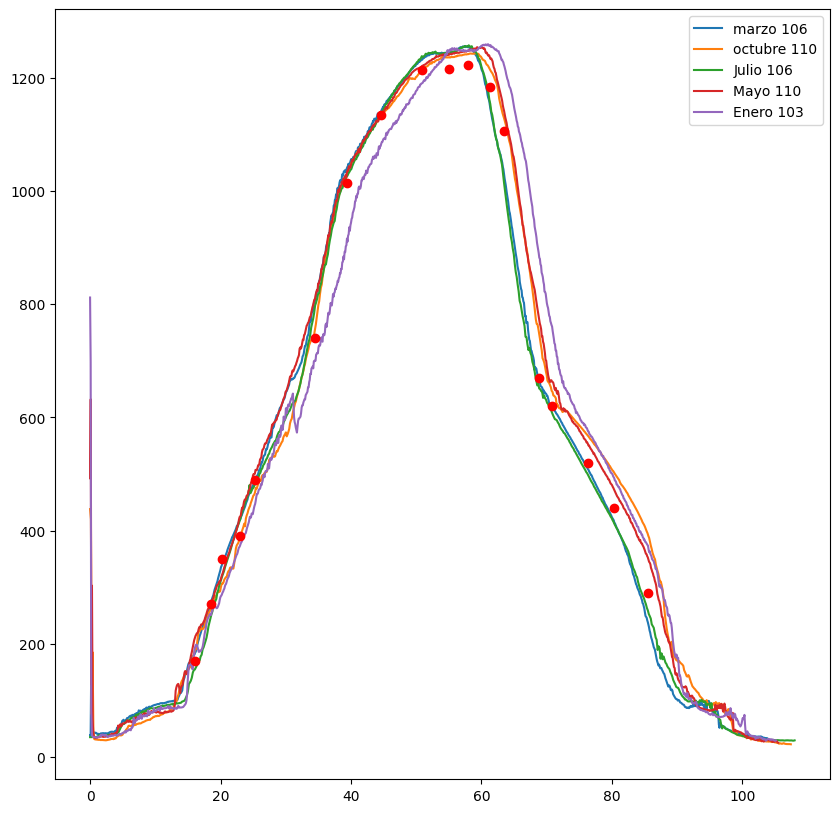

In [448]:
plt.figure(figsize=(10,10))
plt.plot(df_curvamarzo['Distance (m)'],df_curvamarzo['T5 (°C)'], label='marzo 106')
plt.plot(df_curvaoct['Distance (m)'], df_curvaoct['T8 (°C)'], label='octubre 110')
plt.plot(df_curvajul['Distance (m)'], df_curvajul['T5 (°C)'], label='Julio 106')
plt.plot(df_curvamayo['Distance (m)'], df_curvamayo['T5 (°C)'], label='Mayo 110')
plt.plot(df_curvaabril['Distance (m)'], df_curvaabril['T5 (°C)'], label='Enero 103')
plt.plot(distancias2, dftemp[tsp].tail(1).values[0], 'or')

plt.legend()

In [457]:
dftemp['k1sp'].tail(1).values[0]

np.float64(270.0)

In [465]:
np.isclose(dftemp['k1sp'].tail(1).values[0],df_curvajul[df_curvajul['Distance (m)']<58]['T5 (°C)'].values, atol=2).sum()

np.int64(1)

In [467]:
df_curvajul[df_curvajul['Distance (m)']<58].loc[np.isclose(dftemp['k2sp'].tail(1).values[0],df_curvajul[df_curvajul['Distance (m)']<58]['T5 (°C)'].values, atol=2)]

,Time (hh:mm:ss),Distance (m),T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C)
111,2:46:30,16.65,55.2,54.3,176.5,232.4,169.6,244.8,175.3,218.2
112,2:48:00,16.80,54.1,54.4,173.3,235.9,171.0,245.8,176.2,227.0


In [470]:
df_curvaabril[df_curvaabril['Distance (m)']<58].loc[np.isclose(dftemp['k2sp'].tail(1).values[0],df_curvaabril[df_curvaabril['Distance (m)']<58]['T5 (°C)'].values, atol=25)]

,Time (hh:mm:ss),Distance (m),T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T8 (°C)
169,2:32:06,15.06,57.2,53.6,"95,6",173.7,150.8,"136,7"
170,2:33:00,15.14,56.9,53.7,"98,2",175.4,161.9,"145,4"
171,2:33:54,15.23,56.2,53.8,"97,8",174.9,162.6,"150,6"
172,2:34:48,15.32,55.8,53.9,"97,6",174.6,163.2,"152,6"
173,2:35:42,15.41,55.9,54.0,"98,5",177.7,162.9,"158,5"
174,2:36:36,15.50,55.3,54.1,"99,5",180.6,164.6,"162,1"
175,2:37:30,15.59,55.4,54.2,"100,7",185.7,161.5,"169,5"
176,2:38:24,15.68,55.3,54.3,"103,8",191.7,155.4,"173,3"
177,2:39:18,15.77,55.2,54.4,"109,6",197.5,159.8,174
178,2:40:12,15.86,55.6,54.4,114,203.3,176.4,"178,5"


In [311]:
fecha_hora_marzo='2024-03-24 16:02:46'

In [317]:
hmarzo,mmarzo,smarzo=cu.extraccion_hora_datapac(df_curvamarzo['Time (hh:mm:ss)'])

In [471]:
df_curvamarzo.to_csv('curva_marzo_datapac.csv',encoding='utf-8')

In [472]:
df_curvamarzo.columns

Index(['Time (hh:mm:ss)', 'Distance (m)', 'T1 (°C)', 'T2 (°C)', 'T3 (°C)',
       'T4 (°C)', 'T5 (°C)', 'T8 (°C)'],
      dtype='object')

In [319]:
fecha_hora_marzo=cu.fecha_hora_carrito(np.datetime64(fecha_hora_marzo),hmarzo,mmarzo,smarzo)

In [375]:
df_curvamarzo['Fecha']=fecha_hora_marzo

/var/folders/8q/kf3c_66x6b13wzfqj3pfcxqh0000gn/T/ipykernel_30193/3594541315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curvamarzo['Fecha']=fecha_hora_marzo


In [379]:
df_curvamarzo=df_curvamarzo.set_index('Fecha')

<Axes: xlabel='Fecha'>

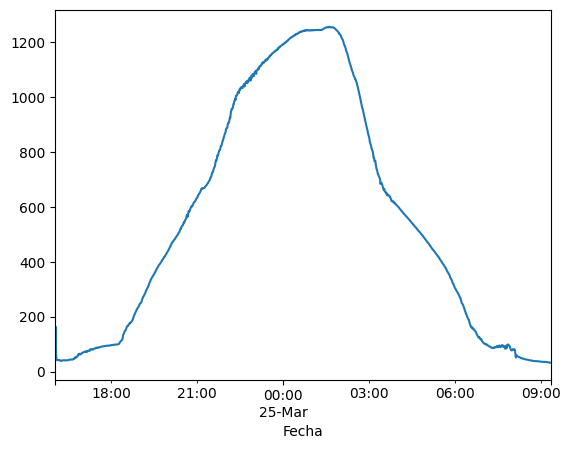

In [380]:
df_curvamarzo['T5 (°C)'].plot()

In [ ]:
curva_termocuplas=((df_curva1['Distance (m)']>=dist_c[0]-0.01) & (df_curva1['Distance (m)']<=dist_c[-1]-0.01))

In [145]:
cond_temp=((dftemp.index.to_period('d')==dia_analisis) & (dftemp.index.to_period('h')> dia_analisis+' 05:00:00'))

In [146]:
dia_analisis

'2024-09-07'

In [147]:
df_curva_interior=df_curva1[curva_termocuplas].copy()

In [148]:
df_curva_interior.shape

(700, 8)

In [363]:
fecha_hora='2024-03-24 16:03:00'
empuje2=cu.empuje_tiempo_proceso(15.89)

In [364]:
velocidad2=cu.velocidad_carro(15.89)

In [365]:
carro,fechas,temperaturas_n=cu.temperaturas_cercanas(fecha_hora,velocidad2,distancias,dftemp[col_temp_control],empuje2,col_temp_control)#col_temp_control

In [366]:
pares=np.zeros(shape=(16,2))
pares[:,0]=distancias
pares[:,1]=temperaturas_n

In [367]:
tiempoa,temperaturesa=cu.curva_completa(pares,velocidad2, 50, metodo='otro')

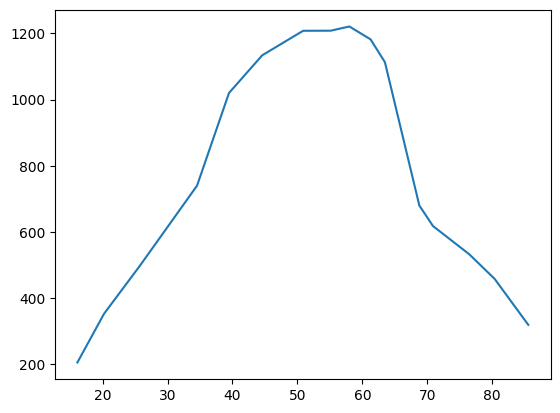

In [368]:
plt.plot(tiempoa,temperaturesa)

In [156]:
pend_int=[]
for _ in range(len(pares)-1):
    pend_int.append(cu.ecuacion_puto_pendiente_intercepto(pares[_+1,1], pares[_,1],pares[_+1,0],pares[_,0]))

In [157]:
pend_int

[(np.float64(33.79562043795621), np.float64(-368.34744525547444)),
 (np.float64(34.37499999999999), np.float64(-380.0624999999998)),
 (np.float64(27.17391304347826), np.float64(-197.58695652173913)),
 (np.float64(56.707317073170714), np.float64(-1217.6707317073165)),
 (np.float64(19.910208861994935), np.float64(234.34315830567982)),
 (np.float64(13.971580535048018), np.float64(499.1050250059542)),
 (np.float64(0.23815194093831876), np.float64(1197.882472017147)),
 (np.float64(3.4252440486384663), np.float64(1022.335845178969)),
 (np.float64(-12.844036697247693), np.float64(1965.9541284403663)),
 (np.float64(-36.67647724700033), np.float64(3426.1677609237104)),
 (np.float64(-79.92828158912893), np.float64(6171.727422855521)),
 (np.float64(-27.38747320790675), np.float64(2558.128244820203)),
 (np.float64(-17.212297088963425), np.float64(1836.9473746259162)),
 (np.float64(-21.937751004016103), np.float64(2197.92479919679)),
 (np.float64(-28.409309482592814), np.float64(2718.0698403539145)

In [158]:
pend_int=np.array(pend_int)

Text(0.5, 1.0, 'Mean Predicted 9.7% MAPE')

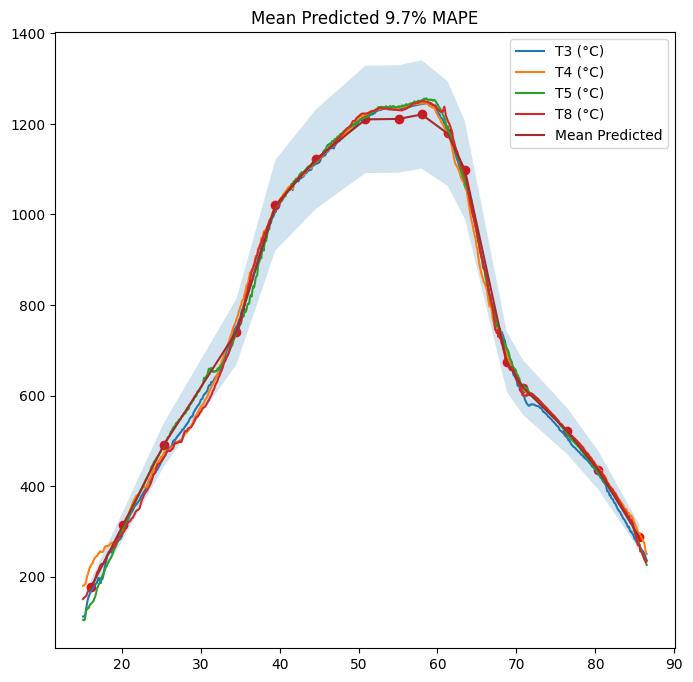

In [159]:
plt.figure(figsize=(8,8))
for j in ['T3 (°C)','T4 (°C)', 'T5 (°C)', 'T8 (°C)']:
    plt.plot(df_curva_interior['Distance (m)'].values,df_curva_interior[j].values, label=j)
plt.scatter(distancias,temperaturas, marker='o', color='red')
plt.plot(tiempo,temperatures, label='Mean Predicted', color='brown')
plt.fill_between(tiempo,temperatures*1.098,temperatures*0.902,alpha=0.2)
plt.legend()
plt.title('Mean Predicted 9.7% MAPE')

In [335]:
from scipy import interpolate as it

In [369]:
fun_t=it.interp1d(distancias,temperaturas_n, kind='linear')

In [370]:
curva_termocuplas2=((df_curvamarzo['Distance (m)']>=distancias[0]-0.01) & (df_curvamarzo['Distance (m)']<=distancias[-1]-1.2))

In [371]:
dist=df_curvamarzo.loc[curva_termocuplas2,['Distance (m)']].values.reshape((-1,))

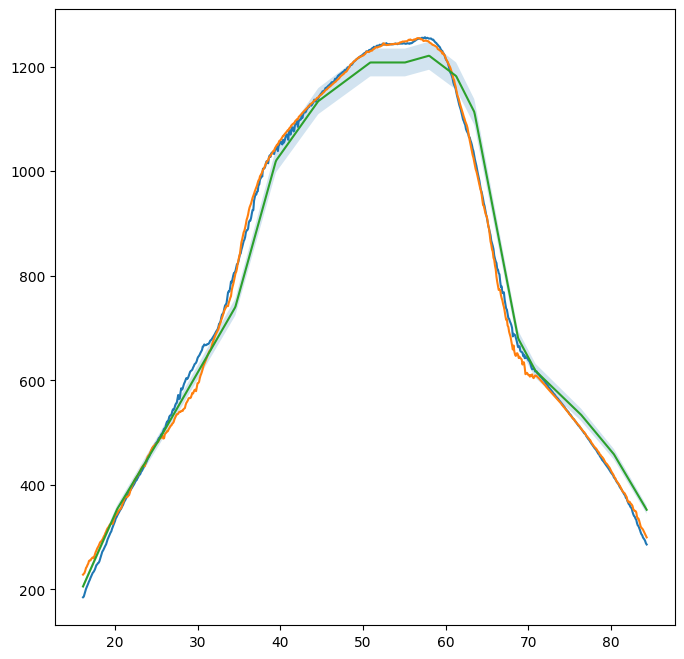

In [474]:
plt.figure(figsize=(8,8))
for j in ['T5 (°C)','T8 (°C)']:
    plt.plot(dist,df_curvamarzo.loc[curva_termocuplas2,[j]].values.reshape((-1,)))
plt.plot(dist,fun_t(dist))
plt.fill_between(dist,fun_t(dist)*1.022,fun_t(dist)*0.978,alpha=0.2)


In [475]:
for k in ['T3 (°C)', 'T5 (°C)', 'T8 (°C)']:
    print(mean_absolute_percentage_error(df_curvamarzo.loc[curva_termocuplas2,[k]].values.reshape((-1,)),
                               fun_t(dist)))

0.04914254778789363
0.044433940366520444
0.04335282810248578


In [166]:
df_distancias_horno=df_curva_interior.loc[curva_termocuplas2,['Time (hh:mm:ss)','Distance (m)']].copy()

In [167]:
#df_distancias_horno.rename(columns={'Time (hh:mm:ss)':'time_h_m_s','Distance (m)':'distancia'}).to_csv('horno_interior_distancias.csv')

### Julio

In [168]:
curva_termocuplas_jul=((df_curvajul['Distance (m)']>=distancias[0]-0.01) & (df_curvajul['Distance (m)']<=distancias[-1]-0.01))

In [169]:
mean_absolute_percentage_error(df_curvajul.loc[curva_termocuplas_jul,['T5 (°C)']].values.reshape((-1,)),
                               fun_t(df_curvajul.loc[curva_termocuplas_jul,['Distance (m)']].values.reshape((-1,))))

0.03878398811986978

### Analisis voraz 2.0

In [178]:
def generar_pares(d,t):
    pares=np.zeros(shape=(16,2))
    pares[:,0]=d
    pares[:,1]=t
    return pares

In [188]:
def curvas_generadas_tiempo(fecha_hora,empuje,velocidad, distancias, dftemp, col_temp_control, metodo,t_interpol):
    carro,fechas,tempesp=cu.temperaturas_cercanas(fecha_hora,velocidad,distancias,dftemp,empuje,col_temp_control)
    par_temp_dis=generar_pares(distancias,tempesp)
    tiempo,temperatures=cu.curva_completa(par_temp_dis,velocidad, t_interpol, metodo=metodo)
    return tiempo, temperatures

15.209999999999999

In [210]:
fecha_hora=dia_analisis+' 06:00:00'
empuje=cu.empuje_tiempo_proceso(15.21)
velocidad=cu.velocidad_carro(15.21)

In [267]:
fecha_dos='2024-01-01 06:00:00'

In [268]:
carritos=[]
fecha_analisis=np.datetime64(fecha_dos)
for i in range(300):
    fecha_analisis=fecha_analisis+np.timedelta64(1440,'m')
    carritos.append(fecha_analisis)

In [270]:
y=[]
for i in np.array(carritos).astype(str):
    a,b=curvas_generadas_tiempo(i,empuje,velocidad, distancias,dftemp[col_temp_control], col_temp_control,'otro',50 )
    y.append(b)

In [272]:
np.array(y).shape

(300, 750)

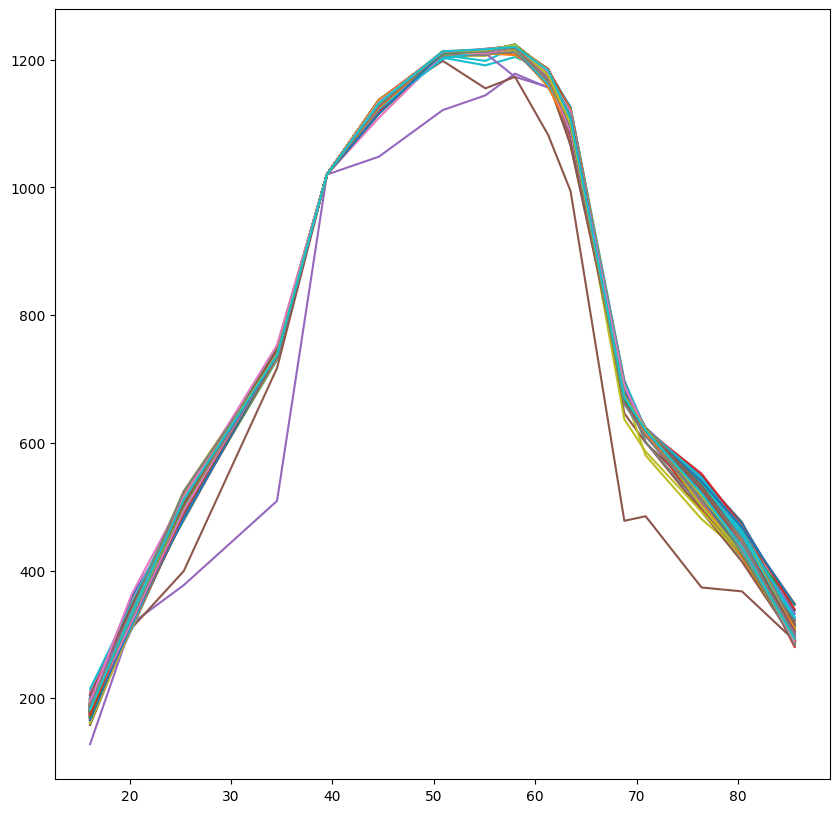

In [285]:
plt.figure(figsize=(10,10))
for i in y:
    plt.plot(x[0],i)

In [276]:
datos_carros_y=np.array(y)

In [284]:
carritos[34]

np.datetime64('2024-02-05T06:00:00')

In [277]:
datos_carros_y.shape

(300, 750)

In [298]:
info=pd.DataFrame(datos_carros_y.T, columns=['carro '+ str(i) for i in range(300)], index=x[0])

In [290]:
info.T.describe().T

,count,mean,std,min,25%,50%,75%,max
16.110000,300.0,182.701333,9.712107,127.900,177.00000,182.8500,188.85000,214.700
16.193673,300.0,185.784477,9.614840,131.750,180.25000,185.9170,191.81650,217.414
16.277347,300.0,188.867563,9.521005,135.600,183.57250,188.9840,194.76150,220.128
16.361020,300.0,191.950730,9.430564,139.449,186.60075,192.0650,197.76300,222.841
16.444694,300.0,195.033890,9.343684,143.299,189.62500,195.1870,200.88275,225.555
...,...,...,...,...,...,...,...,...
85.139408,300.0,307.106743,10.269917,293.577,301.50575,303.4515,309.25750,357.733
85.245306,300.0,304.115630,10.358288,290.261,298.46400,300.4105,306.26400,355.356
85.351204,300.0,301.124580,10.450646,286.945,295.37600,297.4100,303.27050,352.979
85.457102,300.0,298.133510,10.546873,283.629,292.34275,294.3495,300.27675,350.602
